In [1]:
%run prepareStats.py

Last GP in the database: the 2023 Bahrain Grand Prix


## Circuits designed by Hermann Tilke

"Why do we imagine Hermann Tilke driving incredibly cautiously in a Nissan Micra?" [@BritsOnPole](https://twitter.com/britsonpole/status/5287814551)

In [2]:
tilkedromes = ["Kuala Lumpur", "Sakhir", "Istanbul", "Valencia", "Marina Bay", "Shanghai", "Abu Dhabi", "Yeongam County", "Uttar Pradesh", "Austin", "Sochi", "Baku", "Jeddah"]

In [3]:
results.loc[results.location.isin(tilkedromes),"tilkedrome"]=True

In [4]:
results.loc[(results.location == "Hockenheim") & (results.year > 2002),"tilkedrome"]=True
results.loc[(results.location == "Spielberg") & (results.year > 1996),"tilkedrome"]=True
results.loc[(results.location == "Oyama") & (results.year > 2005),"tilkedrome"]=True
results.loc[(results.location == "Montmeló") & (results.year > 2007),"tilkedrome"]=True
results.loc[(results.location == "Nürburg") & (results.year > 2002),"tilkedrome"]=True
results.loc[(results.location == "Mexico City") & (results.year > 2014),"tilkedrome"]=True

In [5]:
resultsBefore2022 = results[~results.year.eq(2022)]

In [6]:
tilkeRatio = resultsBefore2022[resultsBefore2022["tilkedrome"] == True].groupby("year")["raceId"].nunique() / resultsBefore2022.groupby("year")["raceId"].nunique()

<AxesSubplot:xlabel='year'>

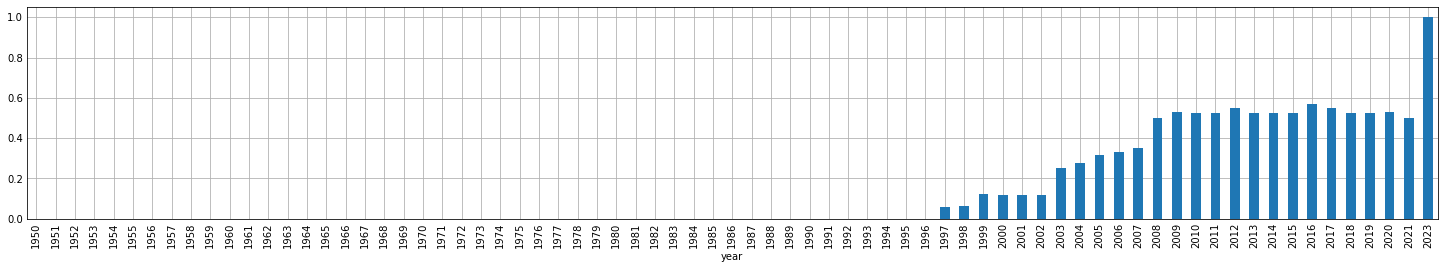

In [7]:
tilkeRatio.plot.bar()

Tilkedromes skyrocketed between 2003 and 2009; they've been hosting around a half of races ever since.

## Street Circuits

In [8]:
yearlyStreetRatio = resultsBefore2022[resultsBefore2022["street"] == True].groupby("year")["raceId"].nunique() / resultsBefore2022.groupby("year")["raceId"].nunique()

<AxesSubplot:xlabel='year'>

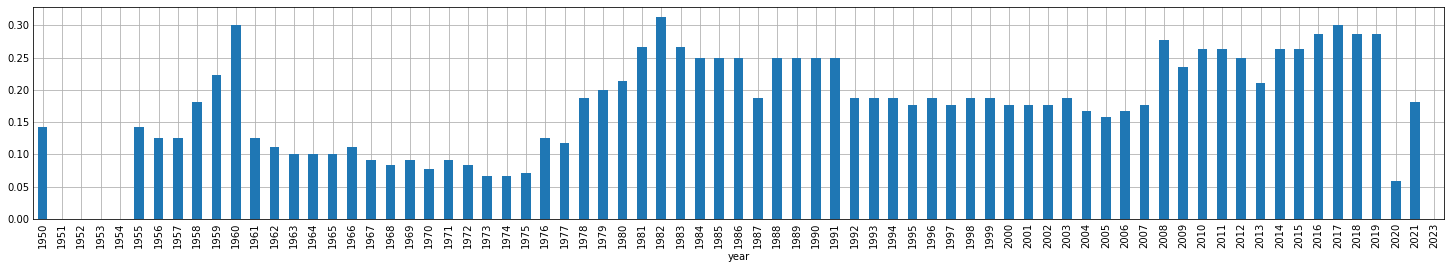

In [9]:
yearlyStreetRatio.plot.bar()

The 1980s were the first era of street circuits (remarkably ugly in that time). The fad came back in the late 2000s with "destination races" (remarkably posh).

## Monaco Grand Prix

"Tell you the truth, I hate Monaco. It’s like riding a bicycle around your living room." Nelson Piquet

In [10]:
fastestLaps = results[results["year"] > 2011].groupby("location")["fastestLapSpeed"].max()

fastestLaps.sort_values()

location
Monte-Carlo       164.769
Marina Bay        178.860
Valencia          190.953
Mexico City       199.223
Yeongam County    199.388
Budapest          205.823
Austin            206.374
Shanghai          207.126
Baku              209.795
Nürburg           210.267
Uttar Pradesh     210.426
Kuala Lumpur      212.104
Istanbul          212.500
Portimão          212.708
Miami             213.255
Montreal          214.833
Montmeló          215.357
Zandvoort         215.654
Hockenheim        217.968
Sochi             219.847
São Paulo         219.909
Abu Dhabi         220.800
Le Castellet      226.775
Suzuka            229.770
Sakhir            230.214
Al Daayen         232.799
Imola             234.121
Melbourne         236.740
Spielberg         236.894
Spa               237.231
Mugello           239.518
Silverstone       243.494
Jeddah            244.962
Monza             255.014
Name: fastestLapSpeed, dtype: float64

Surprise surprise, Monaco is the slowest circuit in the calendar, by far.

In [11]:
uniqueWinningLocations = pd.Series(wins.groupby("driverId")["location"].nunique(), dtype="object", name='uniq')

In [12]:
wins = wins.merge(uniqueWinningLocations, on="driverId", how="right")

In [13]:
wins[wins["uniq"] == 1].groupby(["location"])["name"].nunique().nlargest(7)

location
Indianapolis      10
Monte-Carlo        4
Monza              3
Budapest           2
Montreal           2
New York State     2
Reims              2
Name: name, dtype: int64

Four Monaco GP winners haven't won at any other venue. That's a record -- we'll see why Indy 500 results shouldn't count.

In [14]:
wins["year"] = wins["year"].apply(pd.to_numeric, errors = "coerce").astype(int, errors="ignore")

In [15]:
wins[(wins["uniq"] == 1) & (wins["location"] == "Monte-Carlo")][["name", "year"]].sort_values(by="year")

,name,year
925,Maurice Trintignant,1955
926,Maurice Trintignant,1958
821,Jean-Pierre Beltoise,1972
412,Olivier Panis,1996
205,Jarno Trulli,2004


In [16]:
indyWinnersOnly = wins[(wins["uniq"] == 1) & (wins["location"] == "Indianapolis")][["name"]]

In [17]:
indyWinnersOnly

,name
927,Rodger Ward
954,Jim Rathmann
955,Jimmy Bryan
956,Troy Ruttman
957,Pat Flaherty
989,Johnnie Parsons
990,Sam Hanks
991,Bob Sweikert
1011,Bill Vukovich
1012,Bill Vukovich


In [18]:
indyWinnersOnly = ["Rodger Ward", "Jim Rathmann", "Jimmy Bryan", "Troy Ruttman", "Pat Flaherty", "Johnnie Parsons", "Sam Hanks", "Bob Sweikert", "Bill Vukovich", "Lee Wallard"]

In [19]:
indyWinnersLocations = results[results.name.isin(indyWinnersOnly)].groupby("name")["location"].nunique()

In [20]:
indyWinnersLocations.nlargest(10)

name
Rodger Ward        3
Troy Ruttman       3
Bill Vukovich      1
Bob Sweikert       1
Jim Rathmann       1
Jimmy Bryan        1
Johnnie Parsons    1
Lee Wallard        1
Pat Flaherty       1
Sam Hanks          1
Name: location, dtype: int64

Only two drivers that have won Indy 500 as a F1 World Championship race have participated in any other Grand Prix. Indy 500 was a kind of a spin-off, not really an integral part of the World Championship. 

In [21]:
pd.options.display.float_format = '{:.2%}'.format

In [22]:
qualifying = pd.read_csv(os.path.join("dataErgast", "qualifying.csv"))
qualifying = qualifying[["raceId", "driverId", "position"]]
qualifying.rename(columns = {'position':'qual'}, inplace = True)

In [23]:
results = results.merge(qualifying, on=["raceId", "driverId"], how="right")

In [24]:
poles = results[(results.qual == 1)]

In [25]:
winsFromPolesSince2007 = results[(results.qual == 1) & (results.position == 1) & (results.year > 2006)]

In [26]:
winsFromPolesSince2007.groupby("location")["raceId"].count().nlargest(10)

location
Montmeló       10
Monza          10
Spa            10
Abu Dhabi       9
Marina Bay      8
Monte-Carlo     8
Montreal        8
São Paulo       8
Sakhir          7
Shanghai        7
Name: raceId, dtype: int64

It's said that the Monaco GP gets decided on Saturday, in a qualification. But in the Lewis Hamilton era there are several track with more wins from pole than Monaco.

In [27]:
frequentLocations = ["Budapest", "Montmeló", "Monza", "Sakhir", "Silverstone", "Spa", "Melbourne", "Monte-Carlo", "São Paulo", "Abu Dhabi", " Shanghai", " Marina Bay", "Montreal", " Kuala Lumpur", "Suzuka", "Austin", "Sochi", "Spielberg"]

In [28]:
wfps2007r = winsFromPolesSince2007[(winsFromPolesSince2007.location.isin(frequentLocations))].groupby("location")["raceId"].count() / results[(results.year > 2006) & (results.location.isin(frequentLocations))].groupby("location")["raceId"].nunique()

In [29]:
wfps2007r.nlargest(10)

location
Abu Dhabi     64.29%
Montmeló      62.50%
Monza         62.50%
Spa           62.50%
Montreal      61.54%
Suzuka        58.33%
Spielberg     54.55%
Monte-Carlo   53.33%
São Paulo     53.33%
Austin        50.00%
Name: raceId, dtype: float64

It's tricky to compare absolute numbers, so there are relative chances of winning from pole on various tracks, counting only tracks with 8 or more races since 2007. Even if we keep in mind that in 2012 and 2021 the best qualifier didn't start from pole due to a penalty and a car malfunction respectively, Monaco is still not an outlier.